# Information

Arash Mari Oriad

Mahdi Alikhasi

CI HW4

# KMeans

## import the image

In [ ]:
from io import BytesIO
import requests
import numpy as np 
from PIL import Image

# image url

ImageBaseUrl = 'https://drive.google.com/file/d/15JrXV6FSfzay9wdGWJ2Uc9r9A_sA6uMR/view?usp=sharing'
ImageUrl = 'https://drive.google.com/uc?id=15JrXV6FSfzay9wdGWJ2Uc9r9A_sA6uMR&export=download'

def load_image(url): 
    res = requests.get(url)
    
    img_arr = np.array(Image.open(BytesIO(res.content)))
    return img_arr


ImageArray = load_image(ImageUrl)  


In [ ]:
print(ImageArray.shape)

(256, 512, 3)


In [ ]:
# split image to train and test data
TrainImg = ImageArray[:, :int(ImageArray.shape[1]/2)]
TestImg = ImageArray[:, int(ImageArray.shape[1]/2):]

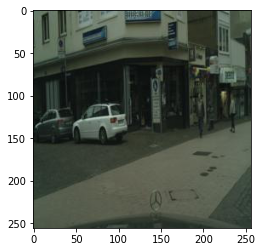

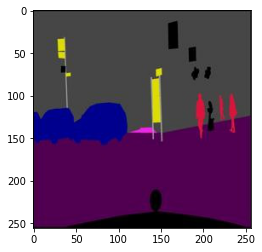

In [ ]:
# print each image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(TrainImg)
plt.show()

imgplot = plt.imshow(TestImg)
plt.show()

## Run K-Mean

K = 1, Distortion = 3002.781362
K = 2, Distortion = 763.036879
K = 3, Distortion = 383.235819
K = 4, Distortion = 243.763573
K = 5, Distortion = 178.642232
K = 6, Distortion = 140.122454
K = 7, Distortion = 113.388167
K = 8, Distortion = 89.906515
K = 9, Distortion = 76.515910
K = 10, Distortion = 66.473543


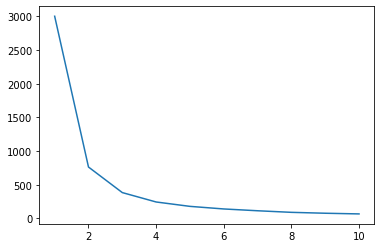

In [ ]:
# run k-mean on dataset
from sklearn.cluster import KMeans

TrainImgReshaped = TrainImg.reshape( (TrainImg.shape[0] * TrainImg.shape[1], TrainImg.shape[2]))
TestImgReshaped = TestImg.reshape( (TestImg.shape[0] * TestImg.shape[1], TestImg.shape[2]))

distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 1000).fit(TrainImgReshaped)

    print("K = %d, Distortion = %f" % (i, kmeans.inertia_ / len(TrainImgReshaped)))
    distortions.append(kmeans.inertia_ / len(TrainImgReshaped))

plt.plot(range(1, 11),distortions)
plt.show()

In [ ]:
# label each pixel in train data
kmeansTrainBaseOnElbow = KMeans(n_clusters=4, random_state=0, max_iter = 1000).fit(TrainImgReshaped)
kmeansTrainBaseOnGroundTruth = KMeans(n_clusters=7,random_state=0, max_iter = 1000).fit(TrainImgReshaped)

## Print Photos

In [ ]:
import random

def generate_colors(n):
  rgb_values = []
  r = int(random.random() * 256)
  g = int(random.random() * 256)
  b = int(random.random() * 256)
  step = 256 / n
  for _ in range(n):
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    rgb_values.append((r,g,b))
  return rgb_values

In [ ]:
# ColorPallete = generate_colors(4)
ColorPallete = {0 : [0x46, 0x46, 0x46], 1:[0x51, 0x0, 0x51] , 2:[0,0,0], 3:[0, 0, 0x8e], 4:[0xdb, 0xda, 0x0c], 5:[0xd7, 0x15, 0x3a], 6: [0xea, 0x28, 0xe1]}


[[70, 70, 70], [81, 0, 81], [0, 0, 0], [0, 0, 142], [219, 218, 12], [215, 21, 58], [234, 40, 225]]


Main Picture


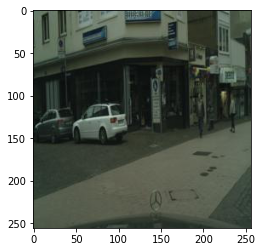

K = 4 (Elbow) Picture


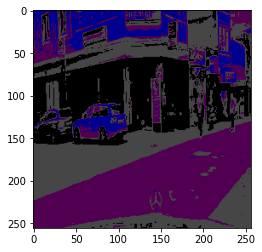

K = Ground Truth Picture


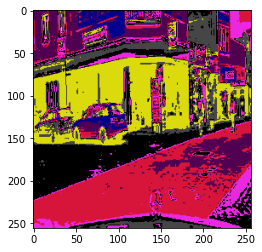

Ground Truth Picture


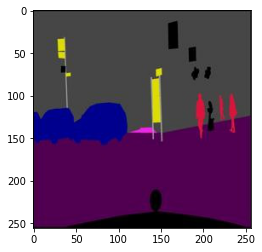

In [ ]:
# show images
print("Main Picture")
imgplot = plt.imshow(TrainImgReshaped.reshape(TrainImg.shape))
plt.show()


TrainBaseOnElbowImg = np.zeros(TrainImg.shape, dtype= int)
Labels = kmeansTrainBaseOnElbow.labels_.reshape((TrainImg.shape[0], TrainImg.shape[1]))
for i in range(len(Labels)):
    for j in range(len(Labels[i])) :
         TrainBaseOnElbowImg[i][j] = ColorPallete[Labels[i][j]]

print("K = 4 (Elbow) Picture")
imgplot = plt.imshow(TrainBaseOnElbowImg)
plt.show()




TrainBaseOnGroundTruthImg = np.zeros(TrainImg.shape, dtype= int)
Labels = kmeansTrainBaseOnGroundTruth.labels_.reshape((TrainImg.shape[0], TrainImg.shape[1]))

for i in range(len(Labels)):
    for j in range(len(Labels[i])) :
         TrainBaseOnGroundTruthImg[i][j] = ColorPallete[Labels[i][j]]

print("K = Ground Truth Picture")
imgplot = plt.imshow(TrainBaseOnGroundTruthImg)
plt.show()

print("Ground Truth Picture")
imgplot = plt.imshow(TestImg)
plt.show()

## Calculate Error and Accuracy

In [ ]:
# because the truth ground has noises, in order to find accuracy we first do kmeans on the ground truth
kmeansTrainGroundTruth = KMeans(n_clusters=7,random_state=0, max_iter = 1000).fit(TestImgReshaped)

Ground Truth Picture


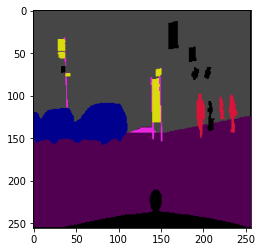

In [ ]:
TrainGroundTruthImg = np.zeros(TrainImg.shape, dtype= int)
Labels = kmeansTrainGroundTruth.labels_.reshape((TrainImg.shape[0], TrainImg.shape[1]))

for i in range(len(Labels)):
    for j in range(len(Labels[i])) :
         TrainGroundTruthImg[i][j] = ColorPallete[Labels[i][j]]

print("Ground Truth Picture")
imgplot = plt.imshow(TrainGroundTruthImg)
plt.show()

In [ ]:
group = {}

for i in range(len(kmeansTrainBaseOnGroundTruth.labels_)):
    
    if kmeansTrainBaseOnGroundTruth.labels_[i] in group:
        pass
    else:
        group[kmeansTrainBaseOnGroundTruth.labels_[i]] = {}
    
    index = kmeansTrainGroundTruth.labels_[i]
    if index in group[kmeansTrainBaseOnGroundTruth.labels_[i]]:
        group[kmeansTrainBaseOnGroundTruth.labels_[i]][index] += 1 
    else:
        group[kmeansTrainBaseOnGroundTruth.labels_[i]][index] = 1



currect = 0
for i in group.keys():
    currect += max(group[i].values())

print("Accuracy is equal to : %f" % (currect / len(TestImgReshaped)))

Accuracy is equal to : 0.674957


# FCM

## Importing Necessary Modules

In [ ]:
! pip install scikit-fuzzy
import skfuzzy as fuzz
from scipy.spatial.distance import cdist 
from collections import Counter

## Defining A List Of Colors
based on ColorPallete

In [ ]:
colors = list(ColorPallete.values())

## Reading Image

In [ ]:
TrainImg = ImageArray[:, :int(ImageArray.shape[1]/2)]
TestImg = ImageArray[:, int(ImageArray.shape[1]/2):]
print(TrainImg.shape)
print(TestImg.shape)

(256, 256, 3)
(256, 256, 3)


## Reshaping Imgaes

In [ ]:
TrainImgReshaped = TrainImg.reshape( (TrainImg.shape[0] * TrainImg.shape[1], TrainImg.shape[2]))
TestImgReshaped = TestImg.reshape( (TestImg.shape[0] * TestImg.shape[1], TestImg.shape[2]))
print(TrainImgReshaped.shape)
print(TestImgReshaped.shape)

(65536, 3)
(65536, 3)


## Ground Truth Clustering

In [ ]:
cntr2, u2, u02, d2, jm2, p2, fpc2 = fuzz.cluster.cmeans(
    TestImgReshaped.T, 7, 2, error=0.005,
    maxiter=1000, init=None)

ground_truth_lables = np.argmax(u2, axis=0)
TestImgClustered = TestImgReshaped
for i in range(TestImgReshaped.shape[0]):
    TestImgClustered[i] = colors[ground_truth_lables[i]]

## Ploting Clustered Ground Truth

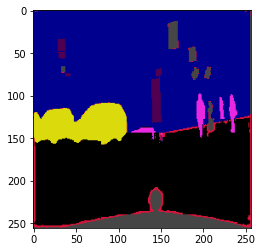

In [ ]:
plt.imshow(TestImgClustered.reshape((TestImg.shape)))

## Elbow Method

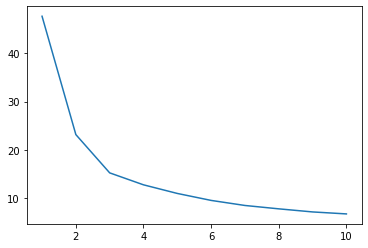

In [ ]:
fcm_distortions = [] 
Cs = range(1,11) 
for c in Cs: 
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    TrainImgReshaped.T, c, 2, error=0.005, maxiter=1000, init=None)    
    fcm_distortions.append(sum(np.min(cdist(TrainImgReshaped, cntr, 'euclidean'),axis=1)) / TrainImgReshaped.shape[0]) 
plt.plot(Cs, fcm_distortions) 

## Clustering TrainImg Using FCM And Elbow Method

based on elbow method diagram, c=4 can be a good option

In [ ]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    TrainImgReshaped.T, 4, 2, error=0.005, maxiter=1000, init=None)

In [ ]:
train_img_lables = np.argmax(u, axis=0)
TrainImgClustered = TrainImgReshaped
for i in range( img1_flat.shape[0]):
      TrainImgClustered[i] = colors[train_img_lables[i]]

## Ploting TrainImgClustered

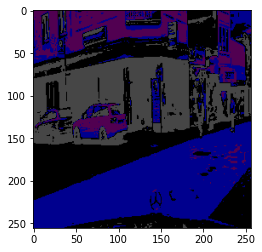

In [ ]:
plt.imshow(TrainImgClustered.reshape((TrainImg.shape)))

## Accuracy Calculation

In [ ]:
temp1=[]
temp2=[]
temp3=[]
counter=0
for i in range (7):
    temp1.append([index for index, value in enumerate(ground_truth_lables) if value == i])
for t in temp1:
    for i in t:
        temp2.append(train_img_lables[i])  
    temp3.append(temp2)
    temp2=[]
for t in temp3:
    counter+=Counter(t).most_common(1)[0][1]
print(counter/TrainImgReshaped.shape[0])

0.506744384765625
